In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/advanced_machine_learning/worldhappiness2019.csv")
df.head()

,Happiness_level,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region
0,Very High,Finland,1.340,1.587,0.986,0.596,0.153,0.393,Finland,Europe,Northern Europe
1,Very High,Denmark,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,Europe,Northern Europe
2,Very High,Norway,1.488,1.582,1.028,0.603,0.271,0.341,Norway,Europe,Northern Europe
3,Very High,Iceland,1.380,1.624,1.026,0.591,0.354,0.118,Iceland,Europe,Northern Europe
4,Very High,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe


In [2]:
conditions = [(df['region'] == 'Europe'), 
              (df['region'] == 'Oceania'), 
              (df['region'] == 'Americas'), 
              (df['region'] == 'Asia'), 
              (df['region'] == 'Africa'), ]
choices = [1,2,3,4,5]
df['region'] = np.select(conditions, choices, default=np.nan)

In [3]:
X = df.drop(['Happiness_level', 'name', 'Country or region', 'sub-region'], axis=1)
y = df['Happiness_level']

X.shape, y.shape

((156, 7), (156,))

In [4]:
X

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,1.340,1.587,0.986,0.596,0.153,0.393,1.0
1,1.383,1.573,0.996,0.592,0.252,0.410,1.0
2,1.488,1.582,1.028,0.603,0.271,0.341,1.0
3,1.380,1.624,1.026,0.591,0.354,0.118,1.0
4,1.396,1.522,0.999,0.557,0.322,0.298,1.0
...,...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411,5.0
152,0.476,0.885,0.499,0.417,0.276,0.147,5.0
153,0.350,0.517,0.361,0.000,0.158,0.025,4.0
154,0.026,0.000,0.105,0.225,0.235,0.035,5.0


###**Explore bivariate results (Use visualizations!)**

Describe any relationships you see between particular features and the target variable

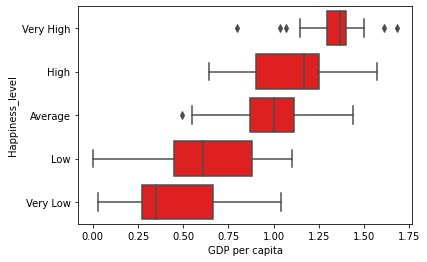

In [5]:
import seaborn as sns
x = sns.boxplot(x="GDP per capita", y="Happiness_level", data=df, color='r')

From the box plot, we could observe that in average, countries with higher GDP per capita normally have higher happiness level. Although there are some outliers in the category of very high happiness level.

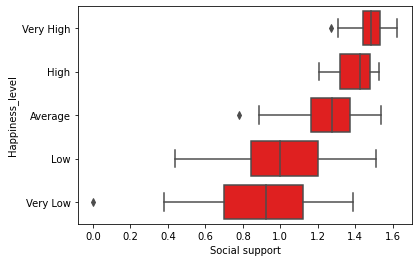

In [6]:
x = sns.boxplot(x="Social support", y="Happiness_level", data=df, color='r')

It is shown in the box plot that, countries with higher level of social support normally have higher happiness level.

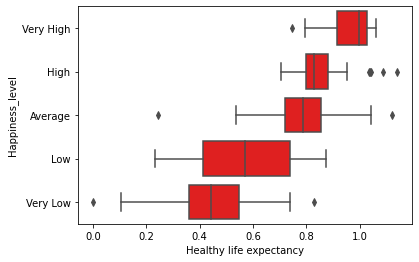

In [7]:
x = sns.boxplot(x="Healthy life expectancy", y="Happiness_level", data=df, color='r')

This graph shows that, countries with higher average healthy life expectancy have a higher happniess level. In the low and very low categories, there is a partial overlap on life expectancy.

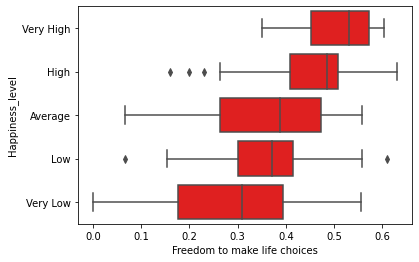

In [8]:
x = sns.boxplot(x="Freedom to make life choices", y="Happiness_level", data=df, color='r')

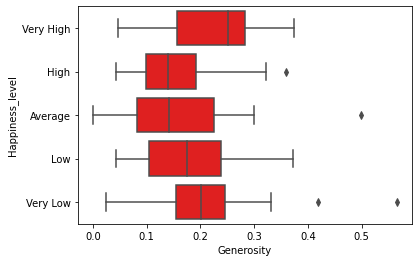

In [9]:
x = sns.boxplot(x="Generosity", y="Happiness_level", data=df, color='r')

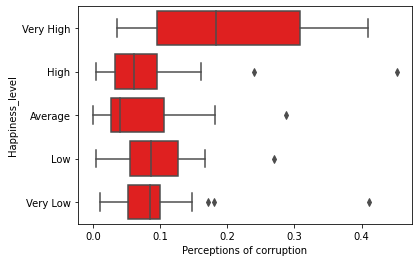

In [10]:
x = sns.boxplot(x="Perceptions of corruption", y="Happiness_level", data=df, color='r')

TypeError: ignored

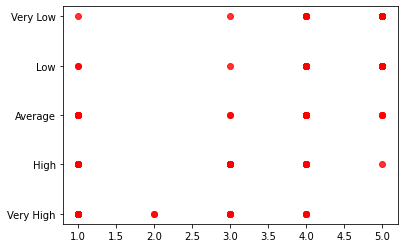

In [11]:
x = sns.regplot(x="region", y="Happiness_level", data=df, color='r')

### **Examine features that predict happiness categories using one or more models that allow for automatic feature selection**

Explain any meaningful findings

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())

(104, 7)
(104,)
['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'region']


In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preprocessing pipelines for both numeric and categorical data.
numeric_features=X.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

#Fit the preprocessor object
preprocess=preprocessor.fit(X_train) 

In [17]:
# Write function to transform data with preprocessor
def preprocessor(data):
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [18]:
# Check shape for keras input:
preprocessor(X_train).shape # pretty small dataset

(104, 7)

In [19]:
# Check shape for keras output:
pd.get_dummies(y_train).shape

(104, 5)

In [20]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# define feature selection
fs = SelectKBest(score_func=f_classif, k=3)

# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(104, 3)


I have recoded 'region' into a numerical category, so the problem would be predicting a categorical output from numeric inputs. With ANOVA feature selection, I've identified the top three features that have the most predictive power, which are: GDP per capita, Social Support, and Healthy life expectancy.

###**Run at least three prediction models to try to predict World Happiness well.**

Discuss which models performed better and point out relevant hyper-parameter values for successful models.

Submit your best model to the leader board for the World Happiness AI Model Share competition.

You have the option to present and/or discuss these models in your report, but it is not required.

**Logistic Regression**

In [21]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=3)

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test))) 

print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg, X_train, y_train, cv=kfold))))

Training set score: 0.625
Test set score: 0.365
Mean Cross Validation, KFold: 0.499


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [22]:
# GridSearchCV for Logistic Regression

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
logreg_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}
logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid).fit(X_train, y_train)

print("Test set Score: {:.3f}".format(logreg_grid.score(X_test, y_test)))
print("Best Parameter: {}".format(logreg_grid.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Test set Score: 0.423
Best Parameter: {'logisticregression__C': 1.0}


**Penalized Logistic Regression**

In [23]:
pen_logreg = LogisticRegression(penalty = 'l1', solver='liblinear').fit(X_train, y_train)

print("Training set score: {:.3f}".format(pen_logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(pen_logreg.score(X_test, y_test)))

print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg, X_train, y_train, cv=kfold))))

Training set score: 0.606
Test set score: 0.385
Mean Cross Validation, KFold: 0.422


In [24]:
# GridSearchCV for Penalized Logistic Regression

pen_logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1',solver='liblinear'))
pen_logreg_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}
pen_logreg_grid = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid).fit(X_train, y_train)

print("Test set Score: {:.3f}".format(pen_logreg_grid.score(X_test, y_test)))
print("Best Parameter: {}".format(pen_logreg_grid.best_params_))

Test set Score: 0.385
Best Parameter: {'logisticregression__C': 2.0}


**KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)

print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=kfold))))

Training set score: 0.712
Test set score: 0.365
Mean Cross Validation, KFold: 0.490


In [26]:
# GridSearchCV for KNN

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1, 50)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid).fit(X_train, y_train)

print("Test set Score: {:.3f}".format(knn_grid.score(X_test, y_test)))
print("Best Parameter: {}".format(knn_grid.best_params_))

Test set Score: 0.423
Best Parameter: {'kneighborsclassifier__n_neighbors': 32}


**Neural Network w/ Keras**

In [27]:
X = df.drop(['Happiness_level', 'name', 'Country or region', 'sub-region'], axis=1)
y = df['Happiness_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

numeric_features=X.columns.tolist()
numeric_features.remove('region')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_features = ['region']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
preprocess=preprocessor.fit(X_train) 
def preprocessor(data):
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

print(preprocessor(X_train).shape)
print(pd.get_dummies(y_train).shape)
print(preprocessor(X_test).shape)
print(pd.get_dummies(y_test).shape)

(104, 11)
(104, 5)
(52, 11)
(52, 5)


In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(64, input_dim=11, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(preprocessor(X_train), pd.get_dummies(y_train), batch_size = 60, epochs = 300, validation_split=0.35)

Epoch 1/300
2/2 [==============================] - 1s 608ms/step - loss: 1.6812 - accuracy: 0.2270 - val_loss: 1.6227 - val_accuracy: 0.2973
Epoch 2/300
2/2 [==============================] - 0s 47ms/step - loss: 1.6688 - accuracy: 0.2115 - val_loss: 1.6170 - val_accuracy: 0.2703
Epoch 3/300
2/2 [==============================] - 0s 43ms/step - loss: 1.6627 - accuracy: 0.2004 - val_loss: 1.6111 - val_accuracy: 0.2703
Epoch 4/300
2/2 [==============================] - 0s 45ms/step - loss: 1.6512 - accuracy: 0.1905 - val_loss: 1.6051 - val_accuracy: 0.2973
Epoch 5/300
2/2 [==============================] - 0s 53ms/step - loss: 1.6434 - accuracy: 0.2215 - val_loss: 1.5991 - val_accuracy: 0.3243
Epoch 6/300
2/2 [==============================] - 0s 44ms/step - loss: 1.6390 - accuracy: 0.2314 - val_loss: 1.5946 - val_accuracy: 0.2973
Epoch 7/300
2/2 [==============================] - 0s 43ms/step - loss: 1.6289 - accuracy: 0.2469 - val_loss: 1.5888 - val_accuracy: 0.2973
Epoch 8/300
2/2 [==

In [29]:
score = model.evaluate(preprocessor(X_test), pd.get_dummies(y_test), batch_size = 60) # extract loss and accuracy from test data evaluation
print(score)

1/1 [==============================] - 0s 16ms/step - loss: 1.1701 - accuracy: 0.4615
[1.1700727939605713, 0.4615384638309479]


In [30]:
# Evaluate and predict keras model with sklearn wrapper
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Tuning Hidden Nodes

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

def create_model(hiddennodes=1):
  model = Sequential()
  model.add(Dense(hiddennodes, input_dim=11, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(5, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, epochs=300, verbose=0)
param_grid = dict(hiddennodes=[30,50,64,80,100])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(preprocessor(X_train), pd.get_dummies(y_train))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.577619 using {'hiddennodes': 50}


In [31]:
# Tuning learn rate

def create_model(learn_rate=0.01):
  model = Sequential()
  model.add(Dense(64, input_dim=11, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(5, activation='softmax'))
	# Compile model
  optimizer = SGD(lr=learn_rate)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, epochs=300, verbose=0)

learn_rate = [0.001, 0.01]
param_grid = dict(learn_rate=learn_rate)
                  
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(preprocessor(X_train), pd.get_dummies(y_train))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.558095 using {'learn_rate': 0.01}
0.382857 (0.113553) with: {'learn_rate': 0.001}
0.558095 (0.067236) with: {'learn_rate': 0.01}


In [32]:
model = Sequential()
model.add(Dense(64, input_dim=11, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax')) 
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(preprocessor(X_train), pd.get_dummies(y_train), batch_size = 60, epochs = 300, validation_split=0.35)
          
score = model.evaluate(preprocessor(X_test), pd.get_dummies(y_test), batch_size = 60) # extract loss and accuracy from test data evaluation
print(score)

Epoch 1/300
2/2 [==============================] - 1s 239ms/step - loss: 1.6291 - accuracy: 0.1074 - val_loss: 1.4112 - val_accuracy: 0.4865
Epoch 2/300
2/2 [==============================] - 0s 44ms/step - loss: 1.3278 - accuracy: 0.5614 - val_loss: 1.2484 - val_accuracy: 0.4595
Epoch 3/300
2/2 [==============================] - 0s 43ms/step - loss: 1.1345 - accuracy: 0.5404 - val_loss: 1.2030 - val_accuracy: 0.4595
Epoch 4/300
2/2 [==============================] - 0s 44ms/step - loss: 0.9697 - accuracy: 0.5515 - val_loss: 1.1709 - val_accuracy: 0.4865
Epoch 5/300
2/2 [==============================] - 0s 45ms/step - loss: 0.8139 - accuracy: 0.6445 - val_loss: 1.2877 - val_accuracy: 0.4324
Epoch 6/300
2/2 [==============================] - 0s 52ms/step - loss: 0.8026 - accuracy: 0.6545 - val_loss: 1.4399 - val_accuracy: 0.4054
Epoch 7/300
2/2 [==============================] - 0s 47ms/step - loss: 0.7875 - accuracy: 0.6855 - val_loss: 1.4944 - val_accuracy: 0.4595
Epoch 8/300
2/2 [==

In [33]:
# Best Model

model = Sequential()
model.add(Dense(64, input_dim=11, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(preprocessor(X_train), pd.get_dummies(y_train), batch_size = 60, epochs = 300, validation_split=0.35)  

Epoch 1/300
2/2 [==============================] - 1s 235ms/step - loss: 1.5929 - accuracy: 0.2680 - val_loss: 1.5657 - val_accuracy: 0.3514
Epoch 2/300
2/2 [==============================] - 0s 49ms/step - loss: 1.5852 - accuracy: 0.3090 - val_loss: 1.5614 - val_accuracy: 0.3514
Epoch 3/300
2/2 [==============================] - 0s 50ms/step - loss: 1.5815 - accuracy: 0.3133 - val_loss: 1.5576 - val_accuracy: 0.3784
Epoch 4/300
2/2 [==============================] - 0s 51ms/step - loss: 1.5749 - accuracy: 0.3189 - val_loss: 1.5522 - val_accuracy: 0.3514
Epoch 5/300
2/2 [==============================] - 0s 43ms/step - loss: 1.5643 - accuracy: 0.3300 - val_loss: 1.5461 - val_accuracy: 0.3514
Epoch 6/300
2/2 [==============================] - 0s 44ms/step - loss: 1.5564 - accuracy: 0.3145 - val_loss: 1.5435 - val_accuracy: 0.3514
Epoch 7/300
2/2 [==============================] - 0s 45ms/step - loss: 1.5529 - accuracy: 0.3090 - val_loss: 1.5389 - val_accuracy: 0.3514
Epoch 8/300
2/2 [==

In [34]:
score = model.evaluate(preprocessor(X_test), pd.get_dummies(y_test), batch_size = 60) # extract loss and accuracy from test data evaluation
print(score)

1/1 [==============================] - 0s 18ms/step - loss: 1.2060 - accuracy: 0.4615
[1.2060420513153076, 0.4615384638309479]


In [35]:
# using predict_classes() for multi-class data to return predicted class index.
print(model.predict_classes(preprocessor(X_test)))
prediction_index=model.predict_classes(preprocess.transform(X_test))

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method
predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 0 0 1 4 1 0 0 1 2 1 0 3 2 1 1 4 4 4 0 4 3 1 3 1 2 0 1 1 4 0 2 1 4 0 4 4
 2 1 1 4 1 4 1 3 1 4 1 1 1 1 2]
['High', 'Average', 'Average', 'High', 'Very Low', 'High', 'Average', 'Average', 'High', 'Low', 'High', 'Average', 'Very High', 'Low', 'High', 'High', 'Very Low', 'Very Low', 'Very Low', 'Average', 'Very Low', 'Very High', 'High', 'Very High', 'High', 'Low', 'Average', 'High', 'High', 'Very Low', 'Average', 'Low', 'High', 'Very Low', 'Average', 'Very Low', 'Very Low', 'Low', 'High', 'High', 'Very Low', 'High', 'Very Low', 'High', 'Very High', 'High', 'Very Low', 'High', 'High', 'High', 'High', 'Low']


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

**Submit Model**


In [36]:
! pip install aimodelshare --upgrade --extra-index-url https://test.pypi.org/simple/ 

Looking in indexes: https://pypi.org/simple, https://test.pypi.org/simple/
Requirement already up-to-date: aimodelshare in /usr/local/lib/python3.6/dist-packages (0.0.22)


In [37]:
#Save preprocessor function to local "preprocessor.zip" file for leaderboard submission
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

In [38]:
#test your preprocessor
prep=ai.import_preprocessor("preprocessor.zip")
prep(X_test)

array([[ 0.43324268,  0.98746467,  0.30608999, -0.49419308, -1.02922311,
        -1.12857011,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.22576861,  0.56985629,  0.46914502, -0.68085385, -0.47864027,
        -0.79447811,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.09373965,  1.04528737, -0.31268295, -0.4555736 ,  0.4848797 ,
        -0.8040236 ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.25170286,  0.62767899,  0.15557766,  0.70301054, -0.71460434,
        -0.202658  ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-1.36093651, -0.48058941, -1.51260074, -0.85464148, -0.08536681,
        -0.08811218,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.8906287 ,  0.89430588,  1.33877186, -0.16592757, -0.32133089,
        -0.41265869,  1.        ,  0.        ,  0.        ,  0.        ,
         0.   

In [46]:
!pip install scikit-learn --upgrade 
import os
os.environ['TF_KERAS'] = '1'
% tensorflow_version 1

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.1)
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [47]:
from aimodelshare.aimsonnx import model_to_onnx
# transform sklearn model to ONNX
onnx_model_keras= model_to_onnx(model, framework='keras', 
                                   transfer_learning=False,
                                   deep_learning=True,
                                   task_type='classification')

# Save model to local .onnx file
with open("onnx_model_keras.onnx", "wb") as f:
    f.write(onnx_model_keras.SerializeToString())

tf executing eager_mode: True
tf.keras model eager_mode: False


AttributeError: ignored

In [41]:
import pickle
#aimodelshare username and password
username = 'chengzhong'
password = '960412cheng'

# load submit model creds (only gives access to s3 bucket)
# Load from pkl file
with open("aws_creds_worldhappiness.pkl", 'rb') as file:
    aws_key,aws_password,region = pickle.load(file)

token=ai.aws.get_aws_token(username, password)
awscreds=ai.aws.get_aws_client(aws_key=aws_key, aws_secret=aws_password, aws_region=region)

In [42]:
# Submit_model() to leaderboard
ai.submit_model("onnx_model_keras.onnx",
                "https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,prediction_submission=predicted_labels,
                preprocessor="preprocessor.zip")

FileNotFoundError: ignored

In [ ]:
import pandas
import aimodelshare as ai
data=ai.get_leaderboard("https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",token,awscreds,verbose=2)

#get rid of any duplicate model submissions
#data=data.loc[data.iloc[:,0:8].duplicated()==False,:]
data.head()

In [ ]:
ai.stylize_leaderboard(data, category="classification")